# Setup

In [1]:
t = var('t')

In [2]:
u = vector([1,1,1,1])


v1 = vector([1,0,0,0])
v2 = vector([0,1,0,0])
v3 = vector([0,0,1,0])

v1 = v1 - (v1*u)*u/u.norm()^2
v2 = v2 - (v2*u)*u/u.norm()^2
v3 = v3 - (v3*u)*u/u.norm()^2

v2 = v2 - (v2*v1)*v1/v1.norm()^2
v3 = v3 - (v3*v1)*v1/v1.norm()^2

v3 = v3 - (v3*v2)*v2/v2.norm()^2

u = u/u.norm()
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v3 = v3/v3.norm()

pretty_print(u)
pretty_print(v1)
pretty_print(v2)
pretty_print(v3)

(1/2, 1/2, 1/2, 1/2)

(1/2*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3), -1/6*sqrt(3))

(0, sqrt(2/3), -1/2*sqrt(2/3), -1/2*sqrt(2/3))

(0, 0, sqrt(1/2), -sqrt(1/2))

The four matrices, can then be rewritten in terms of the 3-space spanned by $v_1, v_2, v_3$.

In [3]:
M123 = matrix([[1,-1,0,0],[0,1,-1,0]])
M124 = matrix([[1,-1,0,0],[0,1,0,-1]])
M134 = matrix([[1,0,-1,0],[0,0,1,-1]])
M234 = matrix([[0,1,-1,0],[0,0,1,-1]])

Pl = matrix([v1,v2,v3]).transpose()

N123 = M123*Pl
N124 = M124*Pl
N134 = M134*Pl
N234 = M234*Pl

w123 = N123.right_kernel().basis_matrix()[0]
w124 = N124.right_kernel().basis_matrix()[0]
w134 = N134.right_kernel().basis_matrix()[0]
w234 = N234.right_kernel().basis_matrix()[0]

w123 = (w123/w123.norm()).simplify_full()
w124 = (w124/w124.norm()).simplify_full()
w134 = (w134/w134.norm()).simplify_full()
w234 = (w234/w234.norm()).simplify_full()

In [4]:
M12_34 = matrix([[1,-1,0,0],[0,0,1,-1]])
M13_24 = matrix([[1,0,-1,0],[0,1,0,-1]])
M14_23 = matrix([[1,0,0,-1],[0,1,-1,0]])

Pl = matrix([v1,v2,v3]).transpose()

N12_34 = M12_34*Pl
N13_24 = M13_24*Pl
N14_23 = M14_23*Pl

w12_34 = N12_34.right_kernel().basis_matrix()[0]
w13_24 = N13_24.right_kernel().basis_matrix()[0]
w14_23 = N14_23.right_kernel().basis_matrix()[0]

w12_34 = (w12_34/w12_34.norm()).simplify_full()
w13_24 = (w13_24/w13_24.norm()).simplify_full()
w14_23 = (w14_23/w14_23.norm()).simplify_full()

pretty_print(w12_34, w13_24, w14_23)

(1/3*sqrt(3), 1/3*sqrt(3)*sqrt(2), 0) (1/3*sqrt(3), -1/6*sqrt(3)*sqrt(2), 1/2*sqrt(2)) (1/3*sqrt(3), -1/6*sqrt(3)*sqrt(2), -1/2*sqrt(2))

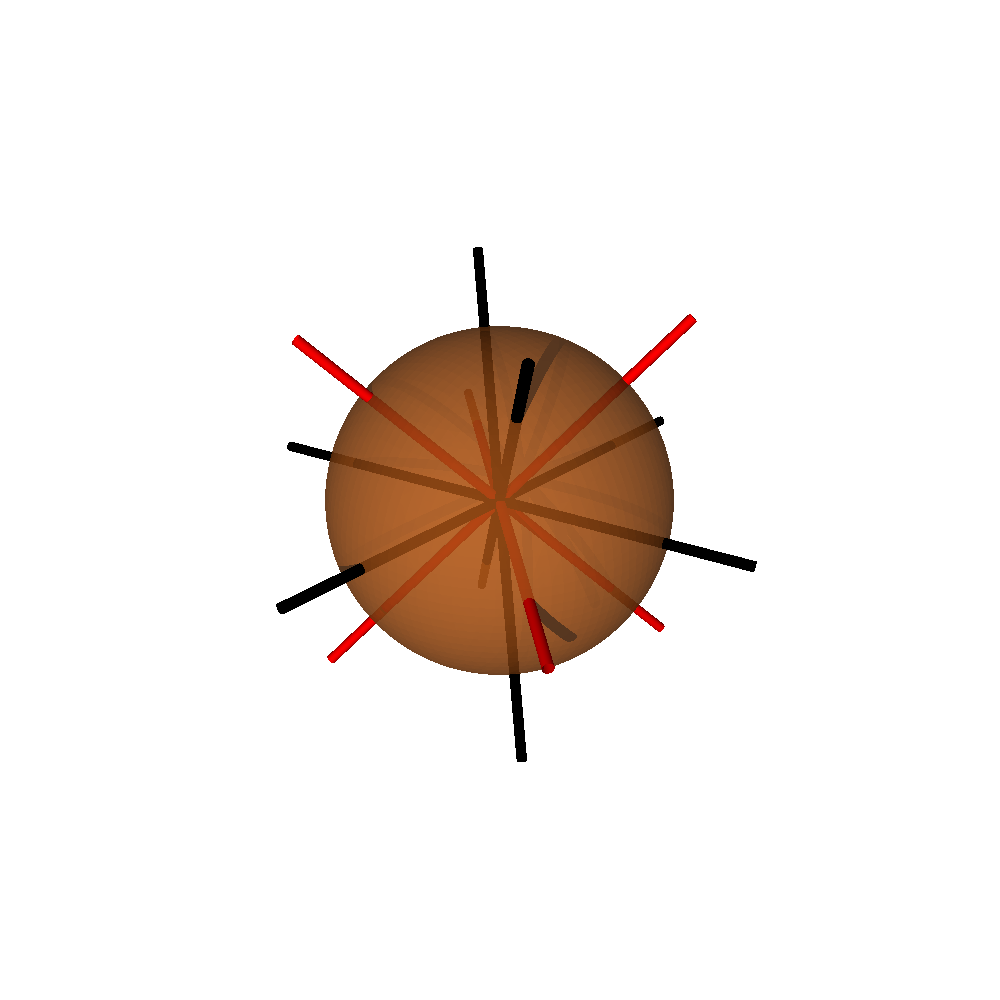

In [5]:
P  = parametric_plot3d( t*w123, (t,-1.5,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w124, (t,-1.5,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w134, (t,-1.5,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w234, (t,-1.5,1.5),thickness=4,color='black')


P += parametric_plot3d( t*w12_34, (t,-1.5,1.5),thickness=4,color='red')
P += parametric_plot3d( t*w13_24, (t,-1.5,1.5),thickness=4,color='red')
P += parametric_plot3d( t*w14_23, (t,-1.5,1.5),thickness=4,color='red')


# just for visualization
x,y,z = var('x,y,z')
from sage.plot.colors import chocolate
P += implicit_plot3d( x^2+y^2+z^2 ==1, 
                     (x,-1.1,1.1),
                     (y,-1.1,1.1),
                     (z,-1.1,1.1),
                     color=chocolate.darker(),
                     opacity=0.7)

#P.show(viewer='threejs',aspect_ratio=1)
P.show(viewer='tachyon',aspect_ratio=1,figsize=10,axes=False,frame=False)

# draw just a few, to see the corners of one of the triangles

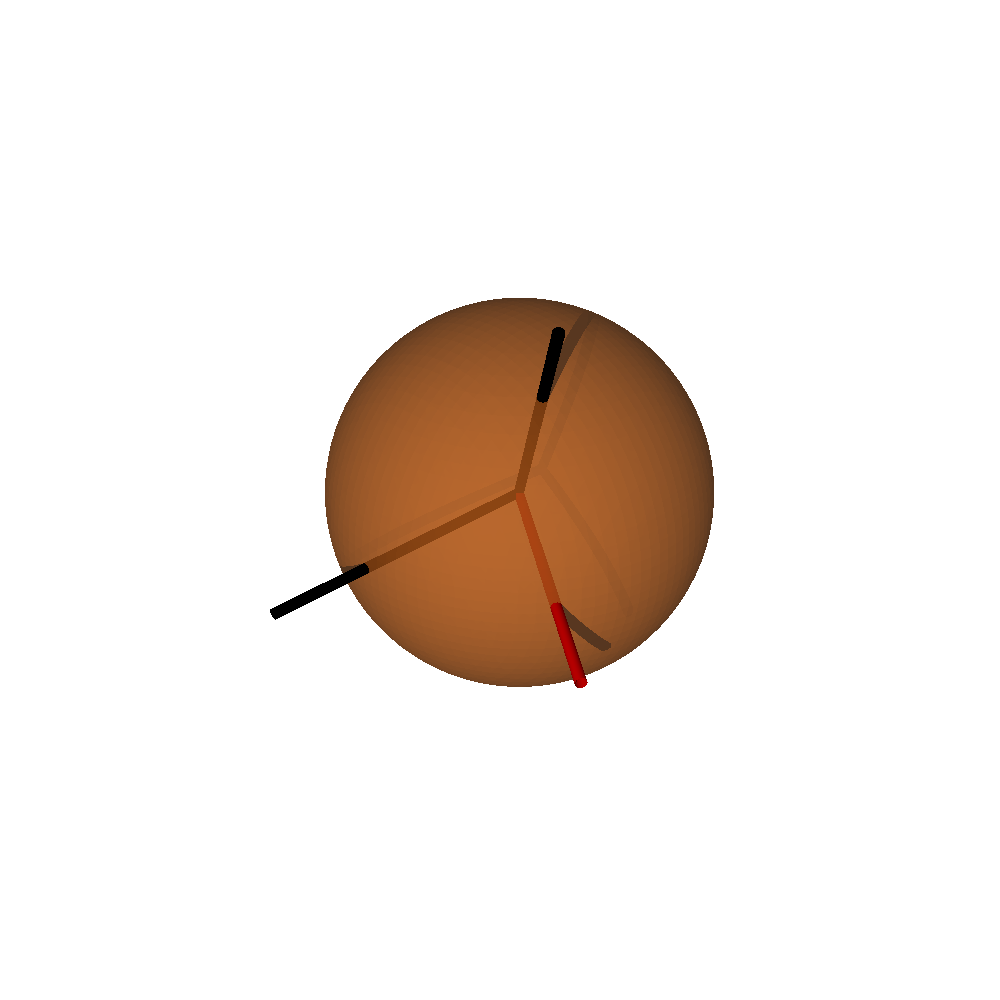

In [6]:
P  = parametric_plot3d( t*w123, (t,0,1.5),thickness=4,color='black')
#P += parametric_plot3d( t*w124, (t,0,1.5),thickness=4,color='black')
#P += parametric_plot3d( t*w134, (t,0,1.5),thickness=4,color='black')
P += parametric_plot3d( t*w234, (t,0,1.5),thickness=4,color='black')


P += parametric_plot3d( t*w12_34, (t,0,1.5),thickness=4,color='red')
#P += parametric_plot3d( t*w13_24, (t,0,1.5),thickness=4,color='red')
#P += parametric_plot3d( t*w14_23, (t,0,1.5),thickness=4,color='red')


# just for visualization
x,y,z = var('x,y,z')
from sage.plot.colors import chocolate
P += implicit_plot3d( x^2+y^2+z^2 ==1, 
                     (x,-1.1,1.1),
                     (y,-1.1,1.1),
                     (z,-1.1,1.1),
                     color=chocolate.darker(),
                     opacity=0.7)

#P.show(viewer='threejs',aspect_ratio=1)
P.show(viewer='tachyon',aspect_ratio=1,figsize=10,axes=False,frame=False)

In [7]:
pretty_print('w123=', w123)
pretty_print('w234=', w234)
pretty_print('w12_34=', w12_34)

pretty_print('w123 * w234=', w123 * w234)
pretty_print('w123 * w12_34=', w123 * w12_34)
pretty_print('w234 * w12_34=', w234 * w12_34)

'w123=' (1/3, 1/3*sqrt(2), 1/3*sqrt(3)*sqrt(2))

'w234=' (1, 0, 0)

'w12_34=' (1/3*sqrt(3), 1/3*sqrt(3)*sqrt(2), 0)

'w123 * w234=' 1/3

'w123 * w12_34=' 1/3*sqrt(3)

'w234 * w12_34=' 1/3*sqrt(3)

I'm having a difficult time seeing an obvious way to draw the 8 generating loops based at a common point. Maybe if I stereographically project?

In [8]:
def stereographic_proj(v,rotX=0,rotY=0,rotZ=0):
    """ Standard Stereographic projection with possible pre-rotation about X, Y and Z axis"""
    w = vector(v)
    mat_rotX = matrix([[1,0,0],[0,cos(rotX),-sin(rotX)],[0,sin(rotX),cos(rotX)]])
    mat_rotY = matrix([[cos(rotY),0,-sin(rotY)],[0,1,0],[sin(rotX),0,cos(rotX)]])
    mat_rotZ = matrix([[cos(rotZ),-sin(rotZ),0],[sin(rotZ),cos(rotZ),0],[0,0,1]])
    w = mat_rotZ*mat_rotY*mat_rotX*w
    return (w[0]/(1-w[2]),w[1]/(1-w[2]))

P  = point(stereographic_proj( w1), size=40, color='red')
P += point(stereographic_proj(-w1), size=40, color='red')

P += point(stereographic_proj( w2), size=40, color='green')
P += point(stereographic_proj(-w2), size=40, color='green')

P += point(stereographic_proj( w3), size=40, color='blue')
P += point(stereographic_proj(-w3), size=40, color='blue')

P += point(stereographic_proj( w4), size=40, color='purple')
P += point(stereographic_proj(-w4), size=40, color='purple')

# a nice generic point as a base point
pt = vector([0,1,2,3])
bp = vector(stereographic_proj(Pl.transpose()*pt))
P += point(bp, size=40, color='black')

P.show(aspect_ratio=1)

NameError: name 'w1' is not defined

A set of loops going through the base point, representing generators.

Bring those loops back up to the sphere!

In [ ]:
def un_stereographic_proj(v):
    norm_squared = v[0]^2+v[1]^2
    return vector([2*v[0]/(1+norm_squared),2*v[1]/(1+norm_squared),(-1+norm_squared)/(1+norm_squared)])


Now bring them back up to 4-space and draw them as components!

## Which of the 2 interations are really necessary? Let's graph their locus

In [ ]:
import itertools as it

In [ ]:
two_interactions = [ matrix([[1 if index == a else -1 if index == b else 0 for index in range(4)]]) \
                    for (a,b) in it.combinations(range(4),2)]

pretty_print( two_interactions )

two_interactions_Pl = [ M*Pl for M in two_interactions]

pretty_print( two_interactions_Pl )

In [ ]:
P = Graphics()
#P += parametric_plot3d( t*w1, (t,-1.5,1.5),thickness=4,color='black')
#P += parametric_plot3d( t*w2, (t,-1.5,1.5),thickness=4,color='black')
#P += parametric_plot3d( t*w3, (t,-1.5,1.5),thickness=4,color='black')
#P += parametric_plot3d( t*w4, (t,-1.5,1.5),thickness=4,color='black')

# just for visualization
x,y,z = var('x,y,z')
from sage.plot.colors import chocolate
P += implicit_plot3d( x^2+y^2+z^2 ==1, 
                     (x,-1.1,1.1),
                     (y,-1.1,1.1),
                     (z,-1.1,1.1),
                     color=chocolate.darker(),
                     opacity=0.7)

for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    P += parametric_plot3d(cos(t)*vv1+sin(t)*vv2, 
                           (t,0,2*pi),
                           thickness=4,
                           color=rainbow(6)[index],
                           plot_points=800)

    
#P.show(viewer='threejs',aspect_ratio=1)
P.show(viewer='tachyon',aspect_ratio=1,figsize=10,axes=False,frame=False)

In [ ]:
P = Graphics()

x,y,z = var('x,y,z')
from sage.plot.colors import chocolate
P += implicit_plot3d( x^2+y^2+z^2 ==1, 
                     (x,-1.1,1.1),
                     (y,-1.1,1.1),
                     (z,-1.1,1.1),
                     color=chocolate.darker(),
                     opacity=0.7)

for (wi, wj) in [(-w1,-w2),(-w1,-w3),(-w1,w4),(-w2,-w3),(-w2,w4),(-w3,w4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    P += parametric_plot(three_curve,
                         (t,0,pi/2),
                         thickness=2,
                         color=rainbow(3)[0])
    P += parametric_plot(three_curve,
                         (t,pi/2,pi),
                         thickness=2,
                         color=rainbow(3)[1])
    P += parametric_plot(three_curve,
                         (t,pi,3*pi/2),
                         thickness=2,
                         color=rainbow(3)[2])
    P += parametric_plot(three_curve,
                         (t,3*pi/2,2*pi),
                         thickness=2,
                         color=rainbow(3)[1])

#P.show(viewer='jmol',aspect_ratio=1)
P.show(viewer='threejs',aspect_ratio=1)
#P.show(viewer='tachyon',aspect_ratio=1,figsize=10,axes=False,frame=False)

## maybe it's more clear in the projection

note that there are _pairs_ of intersections which do not give rise to a triple point. 

In [ ]:
P = Graphics()

# the 2-interations
for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    if index != 0:
        P += parametric_plot(stereographic_proj(cos(t)*vv1+sin(t)*vv2),
                             (t,0,2*pi),
                             thickness=2,
                             color=rainbow(6)[index])
    else:
        P += parametric_plot(stereographic_proj(cos(t)*vv1+sin(t)*vv2),
                             (t,-4.3,1.1),
                             thickness=2,
                             color=rainbow(6)[index])

P += point(stereographic_proj( w1), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w1), size=120, color='black')
P[-1].set_zorder(10)

P += point(stereographic_proj( w2), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w2), size=120, color='black')
P[-1].set_zorder(10)

P += point(stereographic_proj( w3), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w3), size=120, color='black')
P[-1].set_zorder(10)

P += point(stereographic_proj( w4), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w4), size=120, color='black')
P[-1].set_zorder(10)

# a nice generic point as a base point
#pt = vector([-3,-1,1,3])
#bp = vector(stereographic_proj(Pl.transpose()*pt))
#P += point(bp, size=40, color='black')

P.show(aspect_ratio=1,axes=False)
#P.save('/home/knappa/2-interactions.svg',axes=False)

In [ ]:
P = Graphics()

from itertools import combinations

# the 2-interations
for (wi, wj) in [(-w1,-w2),(-w1,-w3),(-w1,w4),(-w2,-w3),(-w2,w4),(-w3,w4)]:
    three_curve = cos(t)*wi+sin(t)*wj
    three_curve = three_curve/three_curve.norm()
    two_curve = vector(stereographic_proj(three_curve)).simplify()
    P += parametric_plot(two_curve,
                         (t,0,pi/2),
                         thickness=2,
                         color=rainbow(3)[0])
    if wi == -w1 and wj == -w2:
        P +=  parametric_plot(two_curve,
                             (t,pi/2,pi/2+pi/16),
                             thickness=2,
                             color=rainbow(3)[1])
        P +=  parametric_plot(two_curve,
                             (t,pi-pi/16,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    else:
        P += parametric_plot(two_curve,
                             (t,pi/2,pi),
                             thickness=2,
                             color=rainbow(3)[1])
    P += parametric_plot(two_curve,
                         (t,pi,3*pi/2),
                         thickness=2,
                         color=rainbow(3)[2])
    P += parametric_plot(two_curve,
                         (t,3*pi/2,2*pi),
                         thickness=2,
                         color=rainbow(3)[1])    


P += point(stereographic_proj( w1), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w1), size=120, color='black')
P[-1].set_zorder(10)

P += point(stereographic_proj( w2), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w2), size=120, color='black')
P[-1].set_zorder(10)

P += point(stereographic_proj( w3), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w3), size=120, color='black')
P[-1].set_zorder(10)

P += point(stereographic_proj( w4), size=120, color='black')
P[-1].set_zorder(10)
P += point(stereographic_proj(-w4), size=120, color='black')
P[-1].set_zorder(10)

P.show(aspect_ratio=1,axes=False,figsize=12)
P.save('/home/knappa/2-interactions-colored-by-traid-group.svg',axes=False)

## curve 8 looks like the most fundamental

In [ ]:
P = Graphics()

# the 2-interations
for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    if index != 0:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,0,2*pi), thickness=2, color=rainbow(6)[index])
    else:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,-4.3,1.1), thickness=2, color=rainbow(6)[index])

P += point(stereographic_proj( w1), size=80, color='red')
P += point(stereographic_proj(-w1), size=80, color='red')

P += point(stereographic_proj( w2), size=80, color='green')
P += point(stereographic_proj(-w2), size=80, color='green')

P += point(stereographic_proj( w3), size=80, color='blue')
P += point(stereographic_proj(-w3), size=80, color='blue')

P += point(stereographic_proj( w4), size=80, color='purple')
P += point(stereographic_proj(-w4), size=80, color='purple')

# a nice generic point as a base point
pt = vector([-1,-1/2,1/2,1])
bp = vector(stereographic_proj(Pl.transpose()*pt))
P += point(bp, size=40, color='black')


maj_axis = (bp-vector(stereographic_proj(-w4)))/2
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.2*min_axis/min_axis.norm()
center = (bp+vector(stereographic_proj(-w4)))/2
curve8 = cos(theta)*1.1*maj_axis+sin(theta)*min_axis + center - 0.1*maj_axis
P += parametric_plot( curve8 ,(theta,0,2*pi))


P.show(aspect_ratio=1,axes=False)

In [ ]:
mode8 = Pl*un_stereographic_proj(curve8)

a = mode8[0]
b = mode8[1]
c = mode8[2]
d = mode8[3]

P  = parametric_plot((a,theta),(theta,0,2*pi),color=rainbow(4)[0])
P += parametric_plot((b,theta),(theta,0,2*pi),color=rainbow(4)[1])
P += parametric_plot((c,theta),(theta,0,2*pi),color=rainbow(4)[2])
P += parametric_plot((d,theta),(theta,0,2*pi),color=rainbow(4)[3])

P.show(axes=False,figsize=8)

### Below, we have the product of all of the generators 

Approximately, anyway, since we don't connect to the base point.

In [ ]:
P = Graphics()

# the 2-interations
for index, Nk in enumerate(two_interactions_Pl):
    basis_matrix = Nk.right_kernel().basis_matrix()
    vv1 = basis_matrix[0]
    vv2 = basis_matrix[1]
    
    vv2 = vv2 - (vv2*vv1)*vv1/vv1.norm()^2
    
    vv1 = (vv1/vv1.norm()).simplify_full()
    vv2 = (vv2/vv2.norm()).simplify_full()
    
    if index != 0:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,0,2*pi), thickness=2, color=rainbow(6)[index])
    else:
        P += parametric_plot( stereographic_proj(cos(t)*vv1+sin(t)*vv2), (t,-4.3,1.1), thickness=2, color=rainbow(6)[index])

P += point(stereographic_proj( w1), size=80, color='red')
P += point(stereographic_proj(-w1), size=80, color='red')

P += point(stereographic_proj( w2), size=80, color='green')
P += point(stereographic_proj(-w2), size=80, color='green')

P += point(stereographic_proj( w3), size=80, color='blue')
P += point(stereographic_proj(-w3), size=80, color='blue')

P += point(stereographic_proj( w4), size=80, color='purple')
P += point(stereographic_proj(-w4), size=80, color='purple')

maj_axis = 1.1*vector(stereographic_proj(w1))
min_axis = vector([-maj_axis[1],maj_axis[0]])
min_axis = 0.9*min_axis/min_axis.norm()
center = vector([0,0])
trivial_curve = cos(theta)*1.1*maj_axis+sin(theta)*min_axis
P += parametric_plot( trivial_curve ,(theta,0,2*pi))

#P += point(trivial_curve(theta=-0.3) ,size=100)

P.show(aspect_ratio=1,axes=False)

For kicks, let's look at an animation of the curve simplifying.

In [ ]:
anivec = []

for scale in srange(1.0,4.0,0.25):
    maj_axis = N(scale*1.1)*vector(stereographic_proj(w1))
    min_axis = vector([-maj_axis[1],maj_axis[0]])
    min_axis = 2*scale*0.9*min_axis/min_axis.norm()
    trivial_curve = cos(theta)*1.1*maj_axis+sin(theta)*min_axis

    trivial_mode = Pl*un_stereographic_proj(trivial_curve)

    a = trivial_mode[0]
    b = trivial_mode[1]
    c = trivial_mode[2]
    d = trivial_mode[3]

    P  = parametric_plot((a,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[0],axes=False)
    P += parametric_plot((b,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[1],axes=False)
    P += parametric_plot((c,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[2],axes=False)
    P += parametric_plot((d,theta),(theta,-0.3,2*pi-0.3),color=rainbow(4)[3],axes=False)

    anivec += [P]
    
a = animate(anivec)


In [ ]:
a.show()

# Next case, 5 particles in $\mathbb{R}$

Now we have ${5 \choose 3} = 10$ disallowed configurations, each of which give a pair of equations which we'll encode as matrices $M_1, \ldots, M_{10}$.

### Important note: Whenever you intersect any two of the 3-alike configurations, you get the all-alike configuration. This is important for getting the projection below. It will no longer be true when we have 6-particles.

Again, though, there is an "all equal" vector $u$ which is parallel to all of the 3-planes determined by the above equations. Let's set up some coordinates so that we can easily project the whole thing out.

In [ ]:
u = vector([1,1,1,1,1])


v1 = vector([1,0,0,0,0])
v2 = vector([0,1,0,0,0])
v3 = vector([0,0,1,0,0])
v4 = vector([0,0,0,1,0])

v1 = v1 - (v1*u)*u/u.norm()^2
v2 = v2 - (v2*u)*u/u.norm()^2
v3 = v3 - (v3*u)*u/u.norm()^2
v4 = v4 - (v4*u)*u/u.norm()^2

v2 = v2 - (v2*v1)*v1/v1.norm()^2
v3 = v3 - (v3*v1)*v1/v1.norm()^2
v4 = v4 - (v4*v1)*v1/v1.norm()^2

v3 = v3 - (v3*v2)*v2/v2.norm()^2
v4 = v4 - (v4*v2)*v2/v2.norm()^2

v4 = v4 - (v4*v1)*v1/v1.norm()^2

u = u/u.norm()
v1 = v1/v1.norm()
v2 = v2/v2.norm()
v3 = v3/v3.norm()
v4 = v4/v4.norm()

print(u)
print(v1)
print(v2)
print(v3)
print(v4)

In [ ]:
M_x = [matrix([[1,-1,0, 0,0],[0,1,-1, 0, 0]]),
       matrix([[1,-1,0, 0,0],[0,1, 0,-1, 0]]),
       matrix([[1,-1,0, 0,0],[0,1, 0, 0,-1]]),
       matrix([[1,0,-1, 0,0],[0,0, 1,-1, 0]]),
       matrix([[1,0,-1, 0,0],[0,0, 1, 0,-1]]),
       matrix([[1,0, 0,-1,0],[0,0, 0, 1,-1]]),
       matrix([[0,1,-1, 0,0],[0,0, 1,-1, 0]]),
       matrix([[0,1,-1, 0,0],[0,0, 1, 0,-1]]),
       matrix([[0,1, 0,-1,0],[0,0, 0, 1,-1]]),
       matrix([[0,0, 1,-1,0],[0,0, 0, 1,-1]])]

Pl = matrix([v1,v2,v3,v4]).transpose()

N_x = [ Np*Pl for Np in M_x ]

In [ ]:
def stereographic_proj(v):
    return (v[0]/(1-v[3]),v[1]/(1-v[3]),v[2]/(1-v[3]))

P = Graphics()

epsilon = pi/6 # part of curve going off to oo to exclude

var('t')

for index, Nn in enumerate(N_x):
    kern = Nn.right_kernel().basis_matrix()
    w1 = kern[0]
    w2 = kern[1]
    
    w2 = w2 - (w2*w1)*w1/w1.norm()^2
    
    w1 = (w1/w1.norm()).simplify_full()
    w2 = (w2/w2.norm()).simplify_full()
    
    curve = cos(t)*w1 + sin(t)*w2
    
    tmin = 0
    tmax = 2*pi
    
    # deal with going off to oo
    #if w1[3] != 0:
    #    t_bad = arctan(w2[3]/w1[3])
    #    if curve(t=t_bad)[3] < 0:
    #        t_bad += pi
    #    tmin = t_bad + epsilon
    #    tmax = tmin + 2*pi - 2*epsilon
    #elif w2[3] != 0:
    #    # so w1[3] == 0
    #    t_bad = pi/2
    #    if curve(t=t_bad)[3] < 0:
    #        t_bad += pi
    #    tmin = t_bad + epsilon
    #    tmax = tmin + 2*pi - 2*epsilon
    
    P += parametric_plot3d( stereographic_proj(curve),
                           (t,tmin,tmax),
                           thickness=4, 
                           plot_points=150,
                           color=rainbow(10)[index])
    

#P.show(viewer='threejs',size=30)
P.show(aspect_ratio=1)

In [ ]:
P.show(viewer='tachyon',aspect_ratio=1)

# Computing the homology for 5 particles

Looking at the above graphs, we see that in the excluded locus, $X$, there are ${5 \choose 3}=10$ copies of $S^1$, each of which is divided into 4 intervals by the ${5 \choose 4}=5$ copies of $S^1$ corresponding to the locus of 4-particle interactions.

This gives us a cell complex for $X$ with 40 1-chains and 10 0-chains. The chain complex for $X$ is then
$$ 0 \to \mathbb{Z}^{40} \to \mathbb{Z}^{10} \to 0$$
Since we know that $H_0(X)=\mathbb{Z}$, the rank of $\partial_1$ is 9 so the only possibility for $H_1(X)$ is $\mathbb{Z}^{31}$.

Now, by Alexander duality, $H^1(S^3\setminus X) = H_1(X) = \mathbb{Z}^{31}$.


See the following computation of the homology groups for a higher number of particles: [The Homology of "k-Equal" Manifolds and Related Partition Lattices _Bjorner A., Welker V._][1]

In particular, when they get to 6 particles, you pick up 2nd homology. When you get 9 particles, you get 3rd homology. Next 12 and 4th homology. This seems to be related to commutation relations from 3-interactions which involve disjoint sets of particles. i.e. 6 particles split as (012)(345), 9 particles as (012)(345)(678), etc. 

This indicates that these higher homology classes should be representable as tori of the appropriate dimension.

[1]: http://www.sciencedirect.com/science/article/pii/S0001870885710122?via%3Dihub